# Tópicos Especiais em Matemática e Computação - 2024.1

## Trabalho 2

**Aluno:** Matheus da Costa Harduim

**Prof:** Camila Martins Saporetti

Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,make_scorer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
print(penguins[penguins.duplicated() == True])
# Não possui dados duplicados

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [5]:
penguins.isnull().sum()
# Com campos nulos

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# balanceamento nominal
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [7]:
penguins = penguins.dropna()

In [8]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
# balanceamento nominal
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [10]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [11]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
# Armazenado para a exposicao nos graficos PCA
target_names = penguins.species.unique()
# Transformacao parametros categoricos para numericos
le = preprocessing.LabelEncoder()
penguins.species = le.fit_transform(penguins.species)
penguins.island = le.fit_transform(penguins.island)
penguins.sex = le.fit_transform(penguins.sex)

In [13]:
target_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
print(penguins)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2            39.1           18.7              181.0   
1          0       2            39.5           17.4              186.0   
2          0       2            40.3           18.0              195.0   
4          0       2            36.7           19.3              193.0   
5          0       2            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
338        2       0            47.2           13.7              214.0   
340        2       0            46.8           14.3              215.0   
341        2       0            50.4           15.7              222.0   
342        2       0            45.2           14.8              212.0   
343        2       0            49.9           16.1              213.0   

     body_mass_g  sex  
0         3750.0    1  
1         3800.0    0  
2         3250.0    0  
4         3450.

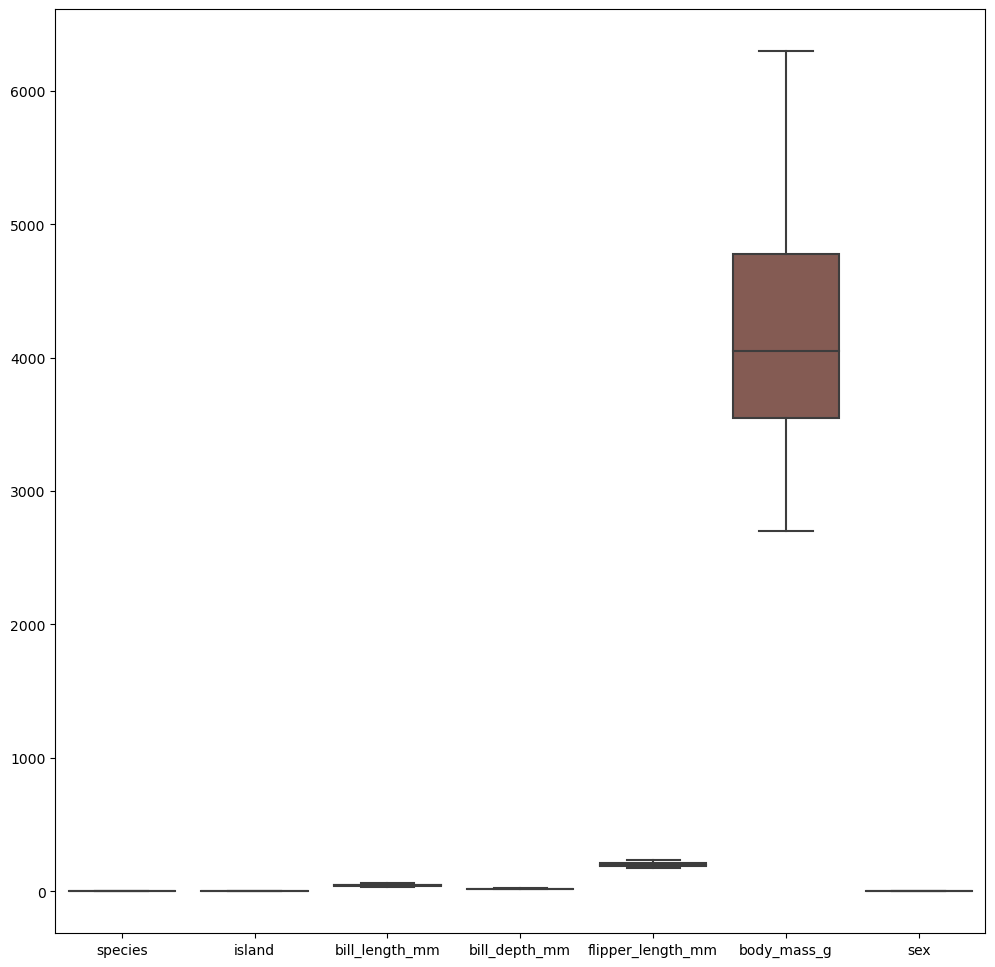

In [15]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=penguins).get_figure().savefig('box_plot_principal')

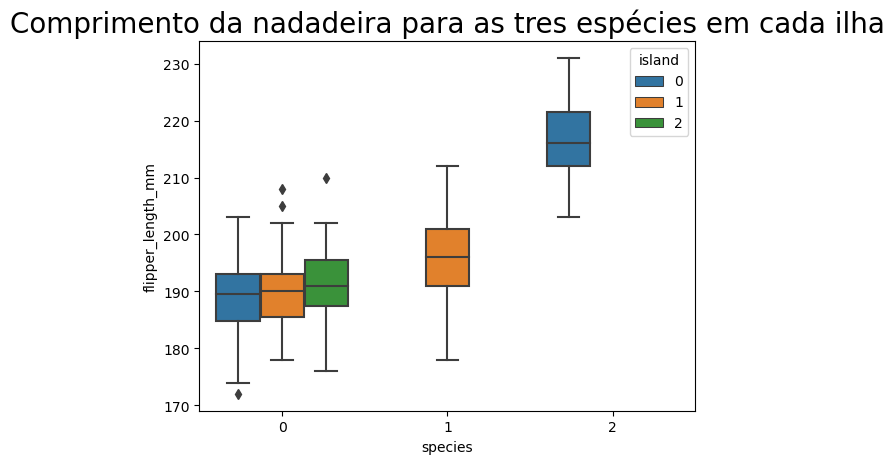

In [16]:
# Como o boxplot comum
plt.title("Comprimento da nadadeira para as tres espécies em cada ilha", size=20)
sns.boxplot(x = "species", y = "flipper_length_mm",
            data =penguins, hue = "island").get_figure().savefig('box_plot1')

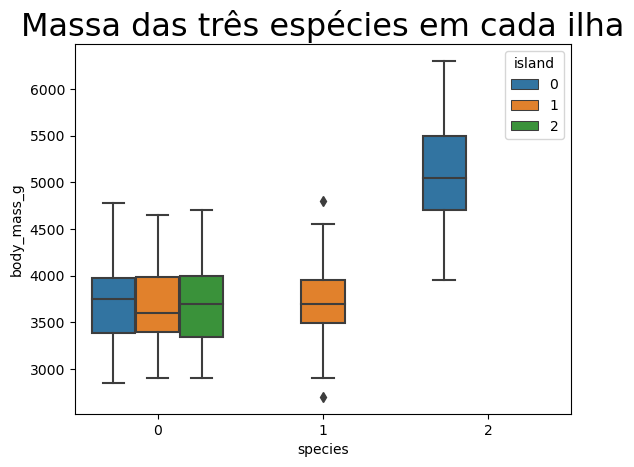

In [17]:
plt.title("Massa das três espécies em cada ilha", size=23)
sns.boxplot(x = "species", y = "body_mass_g", data =penguins, hue = "island").get_figure().savefig('box_plot4')

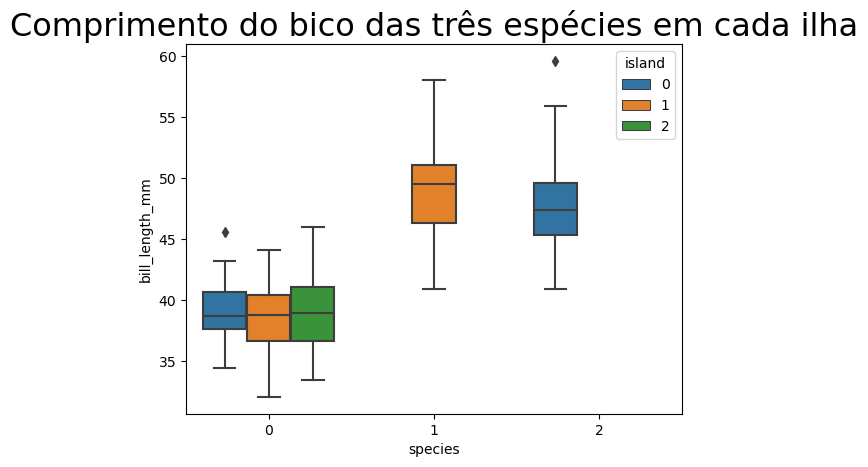

In [18]:
plt.title("Comprimento do bico das três espécies em cada ilha", size=23)
sns.boxplot(x = "species", y = "bill_length_mm", data =penguins, hue = "island").get_figure().savefig('box_plot2')

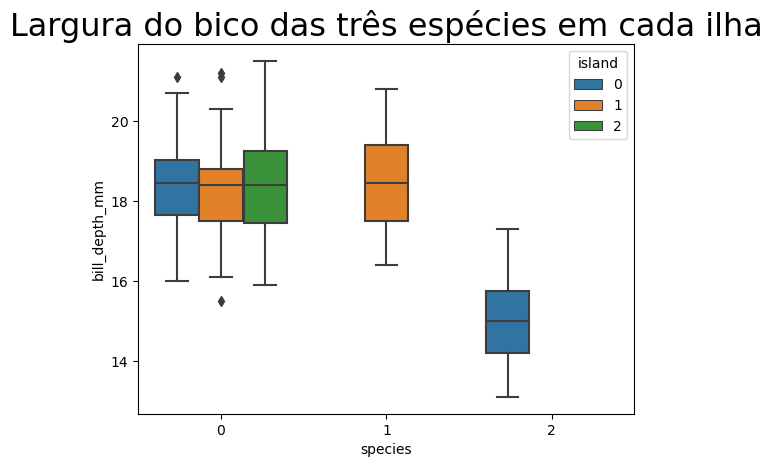

In [19]:
plt.title("Largura do bico das três espécies em cada ilha", size=23)
sns.boxplot(x = "species", y = "bill_depth_mm", data =penguins, hue = "island").get_figure().savefig('box_plot3')

In [20]:
print(f'Media:\n------------\n{penguins.mean()}')
print(f'Desvio:\n------------\n{penguins.std()}')
print(f'Variancia:\n------------\n{penguins.var()}')
print(f'Minimo:\n------------\n{penguins.min()}')
print(f'Maximo:\n------------\n{penguins.max()}')
print(f'Matriz de Corelacao:\n------------\n{penguins.corr()}')

Media:
------------
species                 0.918919
island                  0.651652
bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
sex                     0.504505
dtype: float64
Desvio:
------------
species                0.889718
island                 0.714715
bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
sex                    0.500732
dtype: float64
Variancia:
------------
species                   0.791599
island                    0.510818
bill_length_mm           29.906333
bill_depth_mm             3.877888
flipper_length_mm       196.441677
body_mass_g          648372.487699
sex                       0.250733
dtype: float64
Minimo:
------------
species                 0.0
island                  0.0
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
s

In [21]:
penguins.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435
bill_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078
bill_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000


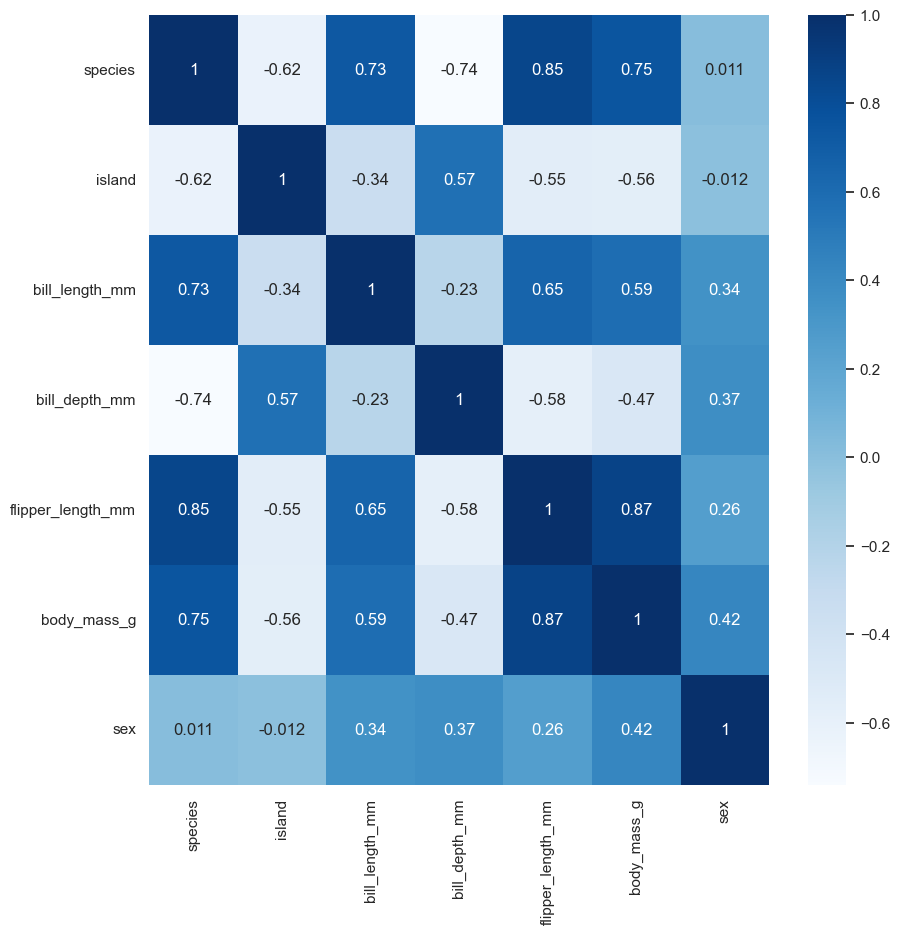

In [22]:
correlacoes = penguins.corr()
sns.set(rc={'figure.figsize':(10,10)})
mapa_de_calor = sns.heatmap(correlacoes, annot=True, cmap='Blues')
mapa_de_calor.get_figure().savefig('mapa_de_calor')

In [23]:
X = StandardScaler().fit_transform(penguins.drop(columns=
['species', 'island','sex']))
y = np.array(penguins['species'])

In [24]:
classifiers = [
    (
    "Nearest Neighbors",'KNN',		KNeighborsClassifier(),
    {'n_neighbors':[1,2,3,4,5,6,10], 'weights':['uniform', 'distance']}
    )
]

In [25]:
dataset_name,data, y = 'Penguin',StandardScaler().fit_transform(penguins.drop(columns=
['species', 'island','sex'])), y

In [26]:
list_models=[]

#mínimo 30 iterações
for run in range(30):
    for name, clf_name, clf, clf_param_grid in classifiers:


      #instancia método de validação cruzada
      #cv = model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=run)
      kf = KFold(n_splits=5)

      #instancia o Grid Search: classificador, grade de parâmetros, validacao cruzada, score
      clf_gcv= GridSearchCV(estimator=clf, param_grid=clf_param_grid, cv=kf, scoring=make_scorer(accuracy_score), n_jobs=-1, verbose=0)

      #atribui o tempo quando inicia o processo de divisão em treinamento e teste
      st = time.time()

      #divide treinameto e teste
      for train_index, test_index in kf.split(X):
         X_train, X_test = X[train_index], X[test_index]
         y_train, y_test = y[train_index], y[test_index]

      #treina
      clf_gcv.fit(X_train, y_train)

      #imprime melhores parâmetros
      print(clf_gcv.best_params_)

      #realiza a predição
      y_pred = clf_gcv.predict(X_test)

      #calcula o tempo final
      st = time.time()-st

      #imprime metricas
      print(run, clf_name, f1_score(y_test, y_pred, average='weighted'), \
			    accuracy_score(y_test, y_pred), \
			    recall_score(y_test, y_pred, average='weighted'), \
			    clf_gcv.best_params_)

      #armazena infromações em um dicionário
      l = {
		'DATASET'	: dataset_name						,
		'MODEL'		: clf_name						,
		'RUN'		: run							,
		'BEST_PARAMS'	: clf_gcv.best_params_			 		,
		'TIME'		: st							,
		'Y_TRUE'     	: y_test						,
		'Y_PRED'     	: y_pred						,
		'F1'     	: f1_score(y_test, y_pred, average='weighted')		,
		'ACCURACY'     	: accuracy_score(y_test, y_pred)			,
		'RECALL'     	: recall_score(y_test, y_pred, average='weighted')	,
		}
    #adiciona a cada rodada em uma lista
      list_models.append(l)

{'n_neighbors': 3, 'weights': 'uniform'}
0 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
1 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
2 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
3 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
4 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
5 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
6 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
7 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
8 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'uniform'}
9 KNN 1.0 1.0 1.0 {'n_neighbors': 3, 'weights': 'uniform'}


In [27]:
#salva os resultados em um dataframe
aux = pd.DataFrame(list_models)

#selecionando modelos
aux_mlp = aux[aux['MODEL']=='KNN']

#media acuracia
acc_mean = aux_mlp['ACCURACY'].mean()

#ordenando
#aux_mlp.sort_values(['ACCURACY'])

#melhores parametros
aux_mlp[aux_mlp.index == 2]['BEST_PARAMS'].values

array([{'n_neighbors': 3, 'weights': 'uniform'}], dtype=object)

In [28]:
acc_mean

1.0

In [29]:
aux

,DATASET,MODEL,RUN,BEST_PARAMS,TIME,Y_TRUE,Y_PRED,F1,ACCURACY,RECALL
0,Penguin,KNN,0,"{'n_neighbors': 3, 'weights': 'uniform'}",1.684572,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
1,Penguin,KNN,1,"{'n_neighbors': 3, 'weights': 'uniform'}",0.031245,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
2,Penguin,KNN,2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.034577,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
3,Penguin,KNN,3,"{'n_neighbors': 3, 'weights': 'uniform'}",0.046877,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
4,Penguin,KNN,4,"{'n_neighbors': 3, 'weights': 'uniform'}",0.046874,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
5,Penguin,KNN,5,"{'n_neighbors': 3, 'weights': 'uniform'}",0.049741,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
6,Penguin,KNN,6,"{'n_neighbors': 3, 'weights': 'uniform'}",0.029234,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
7,Penguin,KNN,7,"{'n_neighbors': 3, 'weights': 'uniform'}",0.031247,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
8,Penguin,KNN,8,"{'n_neighbors': 3, 'weights': 'uniform'}",0.053116,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
9,Penguin,KNN,9,"{'n_neighbors': 3, 'weights': 'uniform'}",0.031143,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",1.0,1.0,1.0
